# Visualizing Job Outcomes of US College Graduates

In this project, we investigate a dataset on job outcomes of US college graduates from 2010 to 2012. The data and its documentation are available [here](https://github.com/fivethirtyeight/data/tree/master/college-majors). Using visualization, we explore the answers to the following questions:
* Do students in more popular majors make more money?
* Do students in more popular majors have lower unemployment rate?
* Do students in majors that produce the most full-time employees have higher earning?
* How many majors are predominantly male? Predominantly female?


# 1. Importing and Cleaning Data

We begin by importing data using pandas and exploring its rows and columns.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
header = recent_grads.iloc[0,:]
recent_grads = recent_grads.iloc[1:,:]
print('First five rows of the dataset:\n\n',recent_grads.head())

First five rows of the dataset:

    Rank  Major_code                                      Major    Total  \
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   
5     6        2418                        NUCLEAR ENGINEERING   2573.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   
5   2200.0    373.0    Engineering    0.144967           17      1857   

       ...        Part_time  Full_time_year_round  Unemployed  \
1      ... 

In [22]:
print('Last five rows of the dataset:\n\n',recent_grads.tail())

Last five rows of the dataset:

      Rank  Major_code                   Major   Total     Men   Women  \
168   169        3609                 ZOOLOGY  8409.0  3050.0  5359.0   
169   170        5201  EDUCATIONAL PSYCHOLOGY  2854.0   522.0  2332.0   
170   171        5202     CLINICAL PSYCHOLOGY  2838.0   568.0  2270.0   
171   172        5203   COUNSELING PSYCHOLOGY  4626.0   931.0  3695.0   
172   173        3501         LIBRARY SCIENCE  1098.0   134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  \
168    Biology & Life Science    0.637293           47      6259   
169  Psychology & Social Work    0.817099            7      2125   
170  Psychology & Social Work    0.799859           13      2101   
171  Psychology & Social Work    0.798746           21      3777   
172                 Education    0.877960            2       742   

         ...        Part_time  Full_time_year_round  Unemployed  \
168      ...             2190                  3602 

In [23]:
print('Basic statistics of the columns:\n\n',recent_grads.describe())

Basic statistics of the columns:

              Rank   Major_code          Total            Men          Women  \
count  172.000000   172.000000     171.000000     171.000000     171.000000   
mean    87.500000  3888.308140   39586.637427   16809.175439   22777.461988   
std     49.796252  1688.969108   63606.184982   28182.454369   41141.960117   
min      2.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.750000  2402.750000    4628.500000    2268.500000    1829.000000   
50%     87.500000  3608.500000   15150.000000    5521.000000    8489.000000   
75%    130.250000  5503.250000   38975.500000   14822.000000   22651.500000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  171.000000   172.000000     172.000000     172.000000     172.000000   
mean     0.524572   357.941860   31362.627907   26169.889535    8882.180233   
std      0.22981

In [24]:
print(recent_grads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 1 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   171 non-null float64
Men                     171 non-null float64
Women                   171 non-null float64
Major_category          172 non-null object
ShareWomen              171 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

We see that the dataset has 21 columns, some of which contain only one null values. In this project, we are intersted in some of the columns whose descriptions of are copied from the dataset [documentation](https://github.com/fivethirtyeight/data/tree/master/college-majors) for reference.

`Men`: Male graduates
<br>`Women`: Female graduates
<br>`ShareWomen`: Women as share of total
<br>`Sample_size`: Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
<br>`Unemployment_rate`: Unemployed / (Unemployed + Employed)
<br>`Median`: Median earnings of full-time, year-round workers
<br>`Total`: Total number of people with major

Since some of the columns has only one null values, we will simply delete the row that has null.

In [25]:
raw_data_count = len(recent_grads.index)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
print('Original row count:',raw_data_count)
print('Cleaned row count:',cleaned_data_count)

Original row count: 172
Cleaned row count: 171


# 2. Data Visualization

In this section, we seek the answers to the proposed questions through various kinds of visualization.
First, we want to know if students in popular majors make more money. To this end, we look at the `Median` column for median earning and the `Total` column for the total number of students each major. 

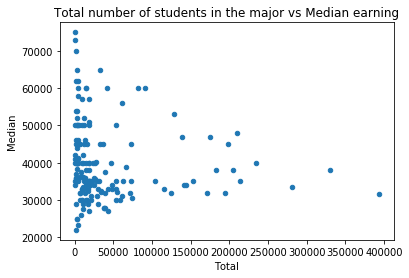

In [27]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title='Total number of students in the major vs Median earning')

We see that it is not the case that students in popular majors make more money. In other words, the popularity of the major does not imply higher earning. In fact, students that top the earning come from some less popular majors.

Next, we see if students in popular majors have lower unemployment rate.

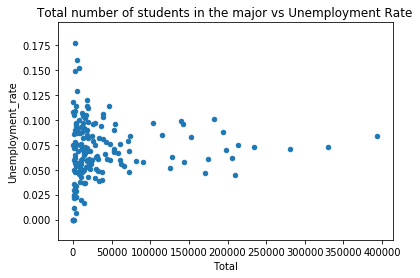

In [28]:
recent_grads.plot(x='Total', y='Unemployment_rate', kind='scatter', title='Total number of students in the major vs Unemployment Rate')

We observe that although students in popular majors have relatively low unemployment rate (about 7.5%), there is not enough evidence from the data to say that popular majors lowers the unemployment rate.

Moreover, as illustrated in the graph below, it is not that the students in majors with the highest number of full-time employees receive higher salary. 

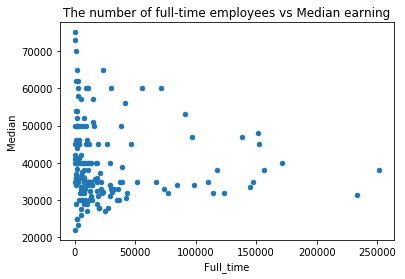

In [29]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='The number of full-time employees vs Median earning')

Next, we will answer the question: how many majors are predominantly male? Predominantly female? To this end, we look at the histogram of the `ShareWomen` column, which indicate the fraction of women in the majors.

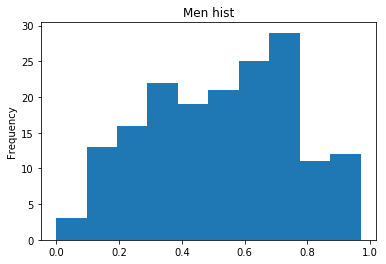

In [34]:
recent_grads['ShareWomen'].plot.hist(title='Men hist')

We see that there are about 30 majors in which 70% of the students are male, while there are 47 majors in which 70% of the students are female.

# 3. Concluding Remarks

In this project, we use some basic data visualization techniques to answer some interesting questions proposed above. 